<a href="https://colab.research.google.com/github/MariiaKhai/Dance_dance/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому прикладі ми використовуємо набір даних, що документують ціни на житло в районі Pacific Heights в Сан-Франциско, і використовуємо просту та множинну лінійні регресії, щоб передбачити, за якою ціною буде продавати житло з урахуванням кількості кімнат, площі та інших факторів.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [13]:
df = pd.read_csv('pacific-heights.csv')
df.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zipcode
0,2243 Franklin St,2.0,2,1463,2/5/2016,1950000,37.795139,-122.425309,Pacific Heights,7,Condominium,1900,94109
1,2002 Pacific Ave APT 4,3.5,3,3291,1/22/2016,4200000,37.794429,-122.428513,Pacific Heights,7,Condominium,1961,94109
2,1945 Washington St APT 411,1.0,1,653,12/16/2015,665000,37.792472,-122.425281,Pacific Heights,3,Condominium,1987,94109
3,1896 Pacific Ave APT 802,2.5,2,2272,12/17/2014,2735000,37.794706,-122.426347,Pacific Heights,6,Condominium,1924,94109
4,1840 Washington St APT 603,1.0,1,837,12/2/2015,1050000,37.793212,-122.423744,Pacific Heights,3,Condominium,2012,94109


In [15]:
df.shape

(439, 13)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        439 non-null    object 
 1   bathrooms      439 non-null    float64
 2   bedrooms       439 non-null    int64  
 3   finishedsqft   439 non-null    int64  
 4   lastsolddate   439 non-null    object 
 5   lastsoldprice  439 non-null    int64  
 6   latitude       439 non-null    float64
 7   longitude      439 non-null    float64
 8   neighborhood   439 non-null    object 
 9   totalrooms     439 non-null    int64  
 10  usecode        439 non-null    object 
 11  yearbuilt      439 non-null    int64  
 12  zipcode        439 non-null    int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 44.7+ KB


In [21]:
corr_matrix= df.corr()
corr_matrix['lastsoldprice'].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.840864
bathrooms        0.768179
totalrooms       0.670726
bedrooms         0.606579
zipcode          0.296032
latitude         0.126480
yearbuilt       -0.214365
longitude       -0.309462
Name: lastsoldprice, dtype: float64

бачимо лінійну кореляцію з наступними факторами 
finishedsqft,   bathrooms,   totalrooms,    bedrooms   

In [22]:
df = df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'zipcode', 'lastsoldprice']]
df = pd.get_dummies(df, columns=['usecode', 'zipcode'])
df.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,lastsoldprice,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_MultiFamily2To4,usecode_SingleFamily,usecode_Townhouse,zipcode_94109,zipcode_94115,zipcode_94123
0,2.0,2,1463,7,1950000,1,0,0,0,0,0,1,0,0
1,3.5,3,3291,7,4200000,1,0,0,0,0,0,1,0,0
2,1.0,1,653,3,665000,1,0,0,0,0,0,1,0,0
3,2.5,2,2272,6,2735000,1,0,0,0,0,0,1,0,0
4,1.0,1,837,3,1050000,1,0,0,0,0,0,1,0,0


In [40]:
import scipy
stat, p = scipy.stats.shapiro(df['lastsoldprice']) 
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
stat, p = scipy.stats.shapiro(df['totalrooms']) 
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

Statistics=0.655, p-value=0.000
Statistics=0.765, p-value=0.000


In [41]:
df['totalrooms'].corr(df['lastsoldprice'], method='spearman')

0.8445443142850304

In [42]:
corr_matrix= df.corr(method='spearman')
corr_matrix['lastsoldprice'].sort_values(ascending=False)

lastsoldprice           1.000000
finishedsqft            0.892991
totalrooms              0.844544
bedrooms                0.831959
bathrooms               0.808215
usecode_SingleFamily    0.588875
zipcode_94123           0.255782
zipcode_94115           0.146984
zipcode_94109          -0.345002
usecode_Condominium    -0.560659
Name: lastsoldprice, dtype: float64

usecode_Condominium   досить сильно впливає на ціну квартири

In [24]:
df = df.drop(['usecode_Duplex', 'usecode_MultiFamily2To4', 'usecode_Townhouse', 'usecode_Cooperative'], axis=1)
df.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,lastsoldprice,usecode_Condominium,usecode_SingleFamily,zipcode_94109,zipcode_94115,zipcode_94123
0,2.0,2,1463,7,1950000,1,0,1,0,0
1,3.5,3,3291,7,4200000,1,0,1,0,0
2,1.0,1,653,3,665000,1,0,1,0,0
3,2.5,2,2272,6,2735000,1,0,1,0,0
4,1.0,1,837,3,1050000,1,0,1,0,0


Будуємо діаграму розсіювання

Text(0, 0.5, 'Price of apartments')

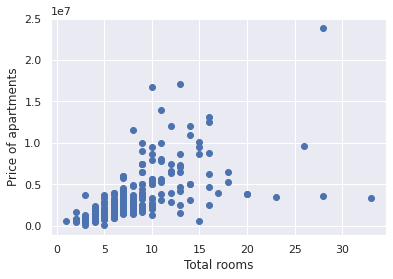

In [29]:
x = df['totalrooms']
y = df['lastsoldprice']

plt.scatter(x, y)
plt.xlabel('Total rooms')
plt.ylabel('Price of apartments')

Використовуємо пакет pairplot для візуалізації зв'язків

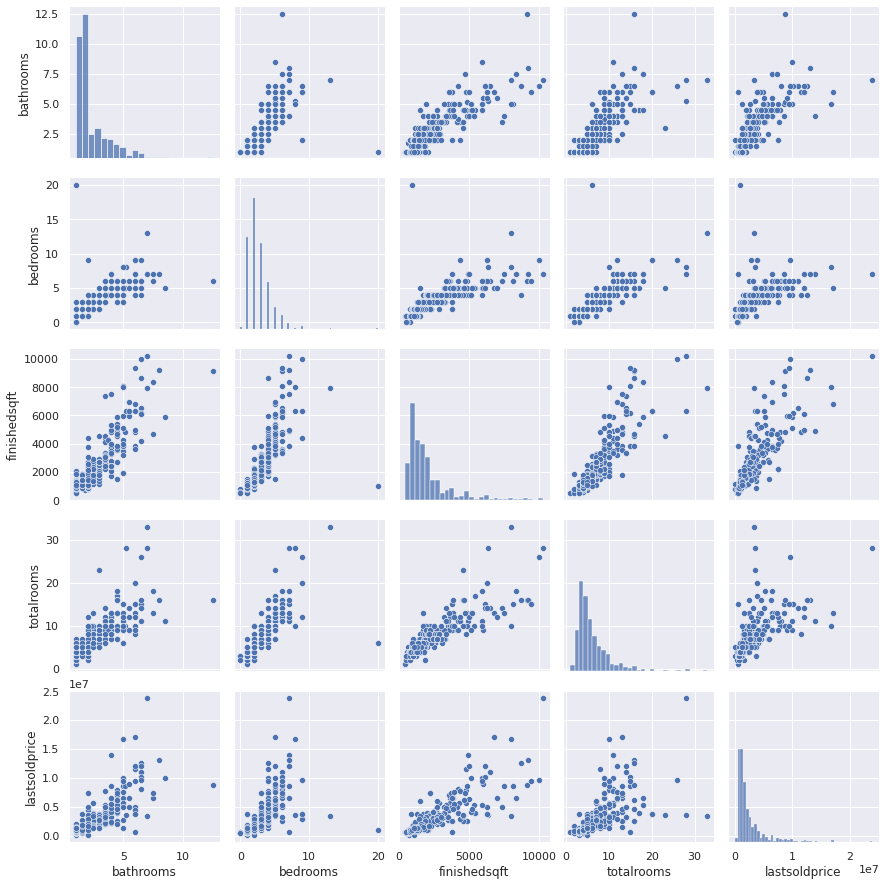

In [26]:
sns.pairplot(df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'lastsoldprice']])

Перевірка змінних на відповідність нормальному закону розподілу за тестом Шапіро-Уілкса